##### 7. Using the data from Question 4, write code to analyze the data and answer the following questions Note -
    1. Draw plots to demonstrate the analysis for the following questions for better visualizations
    2. Write code comments wherever required for code understanding

Insights to be drawn -

- Get all the Earth meteorites that fell before the year 2000
- Get all the earth meteorites co-ordinates who fell before the year 1970
- Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

Data Attributes

- Name of Earth Meteorite - string
- id - ID of Earth Meteorite - int
- nametype - string 
- recclass - string
- mass - Mass of Earth Meteorite - float
- fall - 
- year - Year at which Earth Meteorite was hit - datetime format
- reclat - float
- recclong - float
- point coordinates - list of int

In [1]:
# Installing required packages

import requests
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.read_csv("meteorite_cleaned.csv")    # Reading the dataset

,name,id,recclass,mass,fall,year,reclat,reclong,point coordinates
0,Aachen,1,L5,21.0,Fell,1880-01-01,50.77500,6.08333,"[50.775, 6.08333]"
1,Aarhus,2,H6,720.0,Fell,1951-01-01,56.18333,10.23333,"[56.18333, 10.23333]"
2,Abee,6,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,"[54.21667, -113.0]"
3,Acapulco,10,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,"[16.88333, -99.9]"
4,Achiras,370,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,"[-33.16667, -64.95]"
...,...,...,...,...,...,...,...,...,...
954,Tirupati,24009,H6,230.0,Fell,1934-01-01,13.63333,79.41667,"[13.63333, 79.41667]"
955,Tissint,54823,Martian (shergottite),7000.0,Fell,2011-01-01,29.48195,-7.61123,"[29.48195, -7.61123]"
956,Tjabe,24011,H6,20000.0,Fell,1869-01-01,-7.08333,111.53333,"[-7.08333, 111.53333]"
957,Tjerebon,24012,L5,16500.0,Fell,1922-01-01,-6.66667,106.58333,"[-6.66667, 106.58333]"


In [3]:
dataset  = pd.read_csv("meteorite_cleaned.csv")      # Storing data into raw_dataset variable.

In [4]:
dataset.shape       # Checking shape of the dataset

(959, 9)

In [5]:
dataset.head()      # Top 5 records of the dataset

,name,id,recclass,mass,fall,year,reclat,reclong,point coordinates
0,Aachen,1,L5,21.0,Fell,1880-01-01,50.77500,6.08333,"[50.775, 6.08333]"
1,Aarhus,2,H6,720.0,Fell,1951-01-01,56.18333,10.23333,"[56.18333, 10.23333]"
2,Abee,6,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,"[54.21667, -113.0]"
3,Acapulco,10,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,"[16.88333, -99.9]"
4,Achiras,370,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,"[-33.16667, -64.95]"


In [6]:
dataset.isnull().sum()  # Checking Missing Values.

name                 0
id                   0
recclass             0
mass                 0
fall                 0
year                 0
reclat               0
reclong              0
point coordinates    0
dtype: int64

- Their are no missing values in the dataset.

In [7]:
dataset.dtypes      # Checking datatypes of each features.

name                  object
id                     int64
recclass              object
mass                 float64
fall                  object
year                  object
reclat               float64
reclong              float64
point coordinates     object
dtype: object

- Get all the Earth meteorites that fell before the year 2000

In [8]:
dataset['year'] = pd.to_datetime(dataset['year'], format='%Y-%m-%d', errors='coerce')

In [9]:
# Filtering meteorites that fell before the year 2000
earth_meteorites_before_2000 = dataset[(dataset['fall'] == 'Fell') & (dataset['year'].dt.year < 2000)]

In [10]:
len(earth_meteorites_before_2000)

882

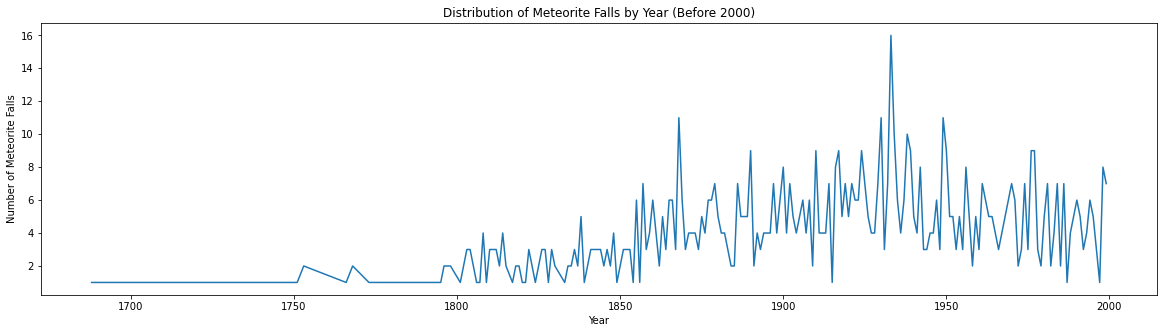

In [11]:
# Plotting the distribution of meteorite falls by year

fall_counts = earth_meteorites_before_2000['year'].dt.year.value_counts().sort_index()
plt.figure(figsize=(20, 5))
plt.plot(fall_counts.index, fall_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Meteorite Falls')
plt.title('Distribution of Meteorite Falls by Year (Before 2000)')
plt.show()

- Get all the earth meteorites co-ordinates who fell before the year 1970

In [12]:
earth_meteorites_before_1970 = dataset[(dataset['fall'] == 'Fell') & (dataset['year'].dt.year < 1970)]

In [13]:
# Extracting the latitude and longitude columns
coordinates = earth_meteorites_before_1970[['reclat', 'reclong']]

In [14]:
coordinates

,reclat,reclong
0,50.77500,6.08333
1,56.18333,10.23333
2,54.21667,-113.00000
4,-33.16667,-64.95000
5,32.10000,71.80000
...,...,...
953,54.50000,35.20000
954,13.63333,79.41667
956,-7.08333,111.53333
957,-6.66667,106.58333


In [15]:
earth_meteorites_before_1970 = dataset[(dataset['fall'] == 'Fell') & (dataset['year'].dt.year < 1970)]

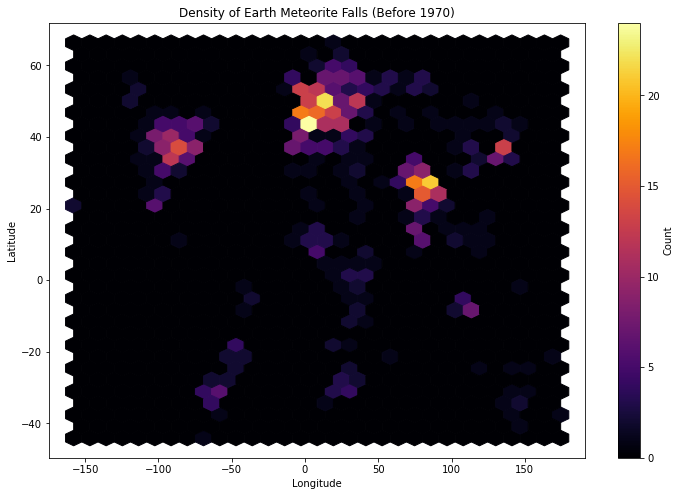

In [16]:
# Plot the density of Earth meteorite falls using hexbins

plt.figure(figsize=(12, 8))
plt.hexbin(earth_meteorites_before_1970['reclong'], earth_meteorites_before_1970['reclat'], gridsize=30, cmap='inferno')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Density of Earth Meteorite Falls (Before 1970)')
plt.colorbar(label='Count')
plt.show()

- Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

In [17]:
earth_meteorites_above_10000kg = dataset[dataset['mass'] > 10000]

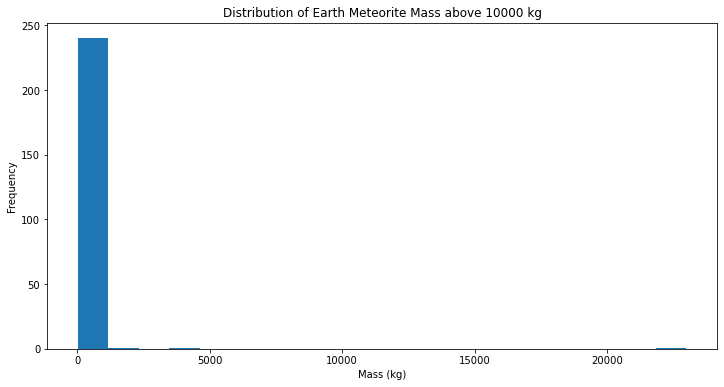

In [18]:
# Plot a histogram of the mass distribution of Earth meteorites above 10000 kg

plt.figure(figsize=(12, 6))
plt.hist(earth_meteorites_above_10000kg['mass'] / 1000, bins=20)
plt.xlabel('Mass (kg)')
plt.ylabel('Frequency')
plt.title('Distribution of Earth Meteorite Mass above 10000 kg')
plt.show()

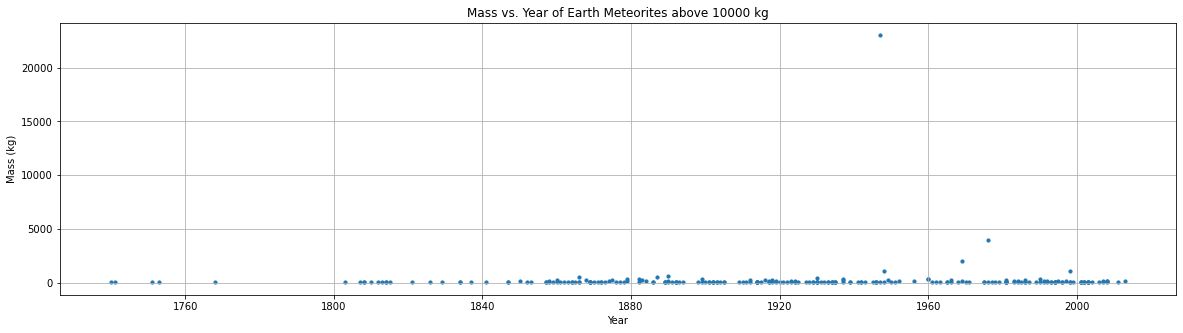

In [19]:
# Plot a scatter plot to visualize the mass vs. year of Earth meteorites above 10000 kg

plt.figure(figsize=(20, 5))
plt.scatter(earth_meteorites_above_10000kg['year'], earth_meteorites_above_10000kg['mass'] / 1000, s=10)
plt.xlabel('Year')
plt.ylabel('Mass (kg)')
plt.title('Mass vs. Year of Earth Meteorites above 10000 kg')
plt.grid(True)
plt.show()